In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'data/module_5_auto.csv'

In [3]:
auto_df = pd.read_csv(path)

In [4]:
auto_df = auto_df._get_numeric_data()

In [5]:
auto_df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
from IPython.display import display
from IPython.html import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
def distribution_plot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
def poly_plot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Training and Testing

#### An important step in testing your model is to split your data into training and testing data. We will place the target data 'price' in a separate dataframe.

In [9]:
y_data = auto_df['price']

In [10]:
x_data = auto_df.drop('price', axis = 1)

Now we randomly split our data into training and testing data using the function **train_test_split**.

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 15% of the total dataset.

In [14]:
# just a sample
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("Number of test samples :", x_test1.shape[0])
print("Number of training samples:", x_train1.shape[0])

Number of test samples : 81
Number of training samples: 120


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

Let's fit the model using the feature 'horsepower'

In [17]:
lr.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's Calculate the R^2 on the test data:

In [18]:
lr.score(x_test[['horsepower']], y_test)

0.707688374146705

We can see the R^2 is much smaller using the test data.

In [19]:
lr.score(x_train[['horsepower']], y_train)

0.6449517437659684

In [21]:
# another sample
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lr.fit(x_train1[['horsepower']],y_train1)
lr.score(x_test1[['horsepower']],y_test1)

0.7340722810055448

#### Sometimes we do not have sufficient testing data; as a result, we may want to perform Cross-validation. Let's go over several methods that we can use for Cross-validation.

### Cross-validation Score

In [22]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv' determines the number of folds; in this case 4.

In [24]:
Rcross = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)

In [25]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

The default scoring is R^2; each element in the array has the average R^2 value in the fold.

Now let's calculate the average and standard deviation of our estimate:

In [26]:
print("The mean of the folds is", Rcross.mean(), "and the standard deviation is", Rcross.std())

The mean of the folds is 0.522009915042119 and the standard deviation is 0.2911839444756029


#### We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.

In [27]:
-1 * cross_val_score(lr,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

In [28]:
# another sample
Rc = cross_val_score(lr, x_data[['horsepower']], y_data, cv=2)
Rc

array([0.59015621, 0.44319613])

#### We can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data.

In [29]:
from sklearn.model_selection import cross_val_predict

In [31]:
yhat = cross_val_predict(lr,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [32]:
yhat.size

201

## Overfitting, Underfitting, and Model Selection

It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world. One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create Multiple linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [34]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Prediction using training data

In [35]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

Prediction using test data

In [36]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.

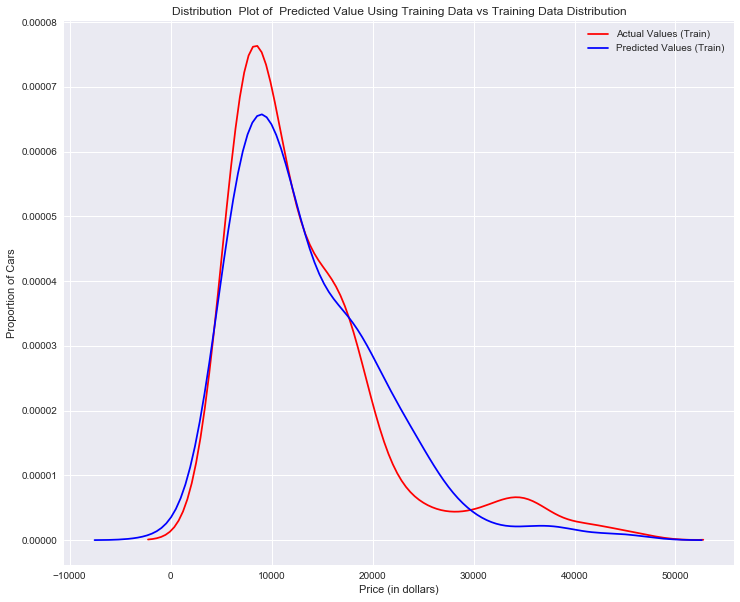

In [40]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
distribution_plot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset?

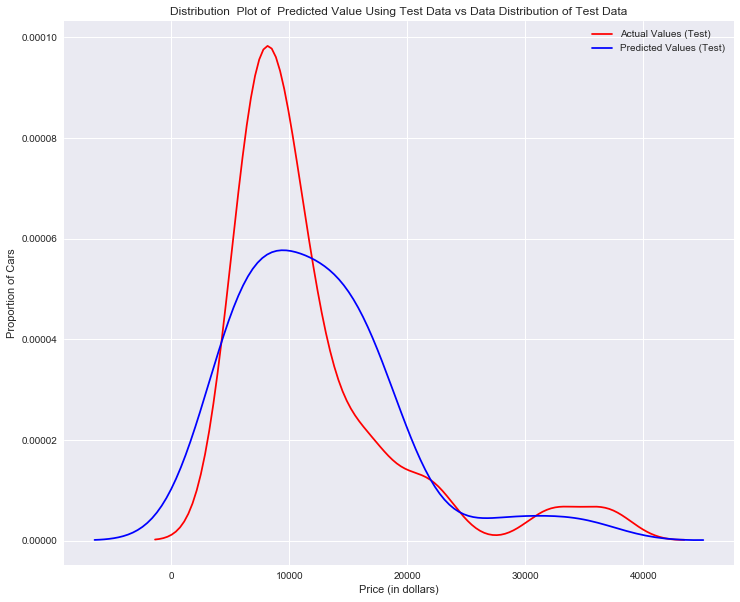

In [41]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
distribution_plot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

Comparing both the figures, it is evident the distribution of the test data in the firs figure is much better at fitting the data. This difference in the second figure is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [42]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting

Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

Let's use 55 percent of the data for testing and the rest for training:

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature 'horse power'.

In [44]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [45]:
polyr = LinearRegression()
polyr.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can see the output of our model using the method "predict." then assign the values to "yhat".

In [47]:
yhat = polyr.predict(x_test_pr)
yhat[0:5]

array([ 6728.77492727,  7308.09738048, 12213.83912148, 18893.06269972,
       19995.73316497])

Let's take the first five predicted values and compare it to the actual targets.

In [48]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.77492727  7308.09738048 12213.83912148 18893.06269972]
True values: [ 6295. 10698. 13860. 13499.]


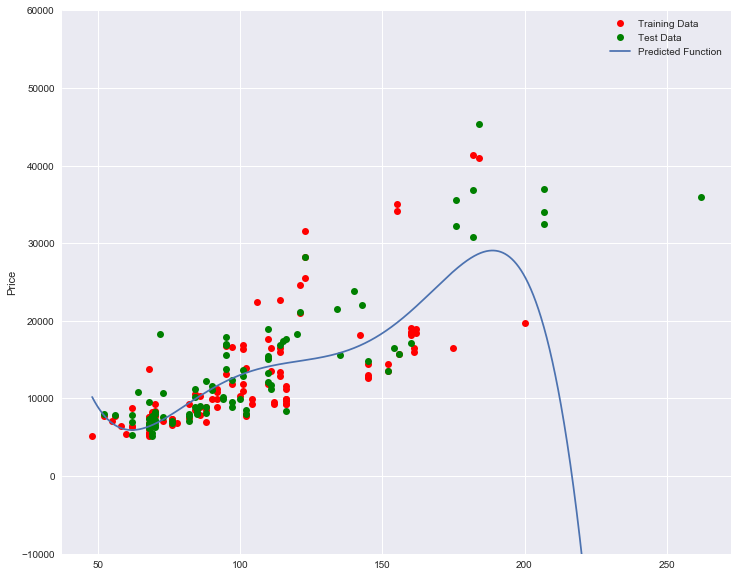

In [49]:
poly_plot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, polyr, pr)

A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

R^2 of the training data:

In [51]:
polyr.score(x_train_pr, y_train)

0.5567716899817778

R^2 of the test data:

In [53]:
polyr.score(x_test_pr, y_test)

-29.871838229908324

#### We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

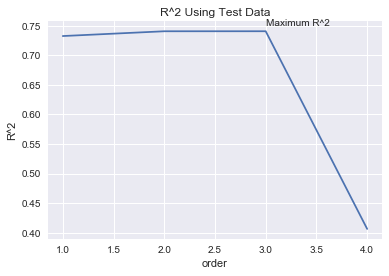

In [54]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

#### We see the R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four.

In [57]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    poly_plot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

#### The following interface allows us to experiment with different polynomial orders and different amounts of data.

<function __main__.f>

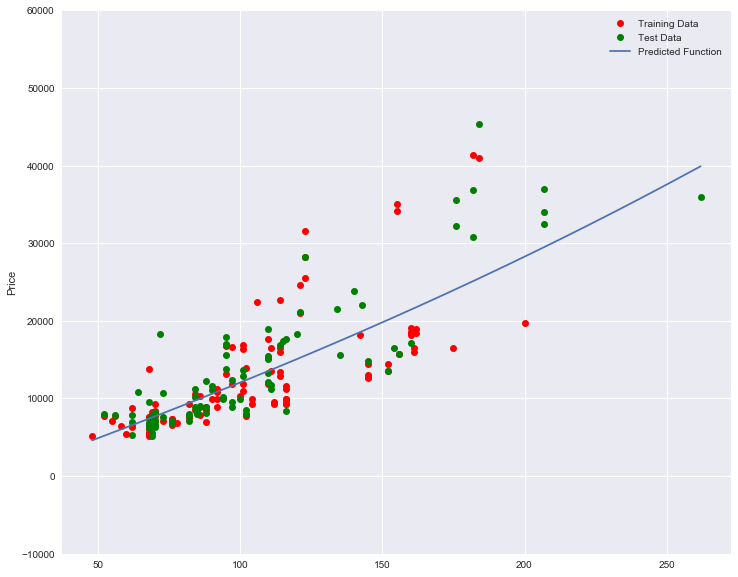

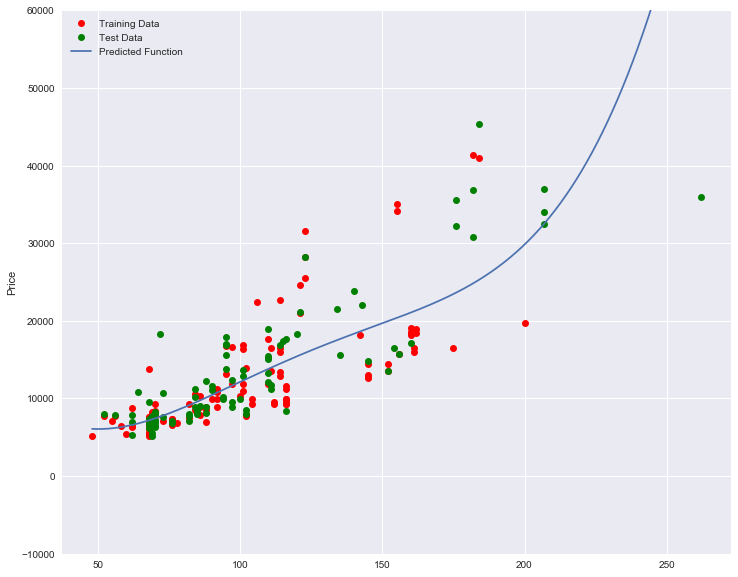

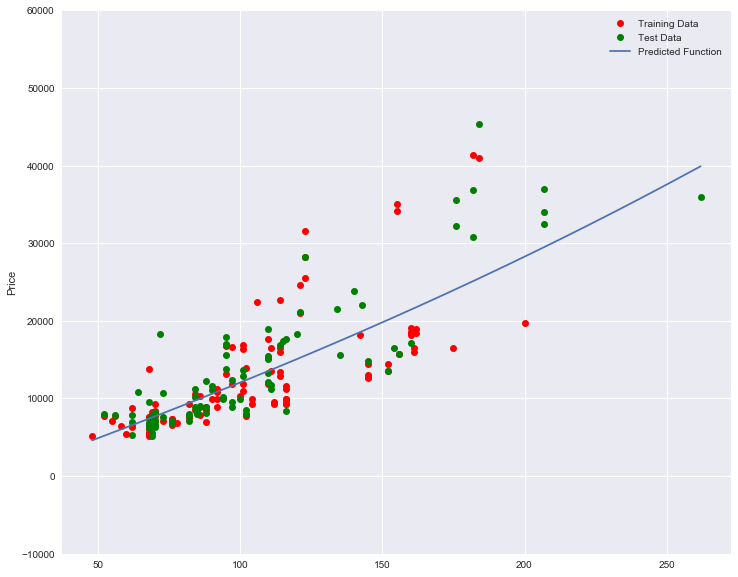

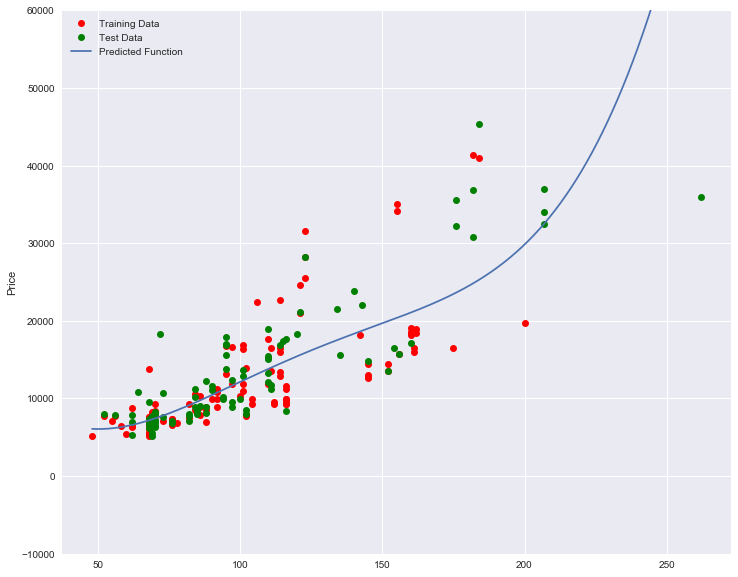

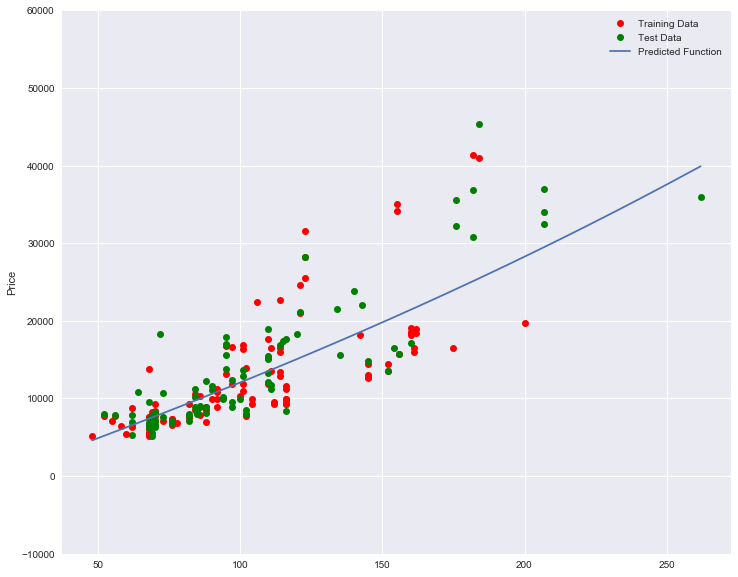

In [58]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

## Ridge Regression

In this section, we will review Ridge Regression we will see how the parameter alpha changes the model. Note here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.

In [59]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [60]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter to 0.1

In [61]:
RidgeModel=Ridge(alpha=0.1)

In [62]:
RidgeModel.fit(x_train_pr, y_train)

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
yhat = RidgeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set

In [65]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of Alfa that minimizes the test error, for example, we can use a for loop.

In [66]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RidgeModel = Ridge(alpha=alfa) 
    RidgeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RidgeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RidgeModel.score(x_train_pr, y_train))

We can plot out the value of R^2 for different alphas

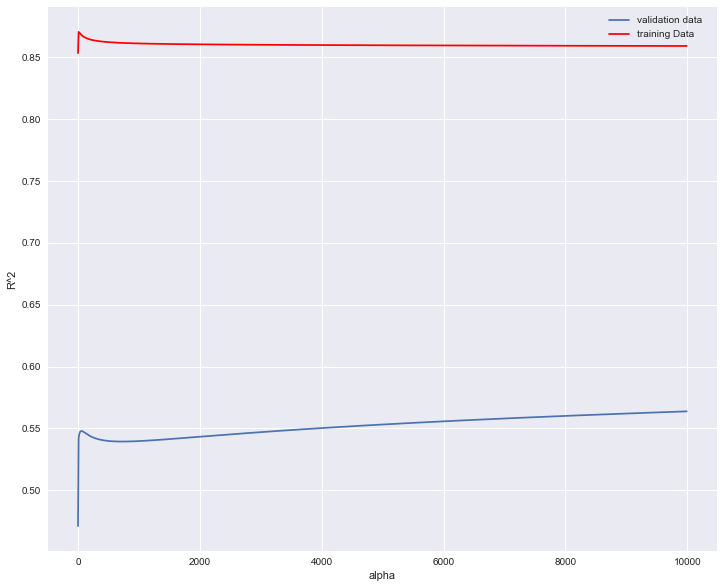

In [67]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa

The red line in figure 6 represents the R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data. The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.

## Grid Search

#### The term Alfa is a hyperparameter, sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Let's create a RidgeRegions object

In [70]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Let's create a Ridge grid search object

In [71]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [72]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [73]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

We now test our model on the test data

In [74]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149